In [1]:
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

X_FILTER = [
    'time_rms', 'time_skewness', 'time_kurtosis', 'time_crest_factor',
    'time_shape_factor', 'time_mean', 'time_std', 'time_peak',
    'time_mean_diff', 'time_std_diff', 'time_min_diff', 'time_max_diff',
    'fft_centroid', 'fft_bandwidth', 'fft_peak_freq', 'fft_over_env',
    'fft_amp_1x', 'fft_amp_2x', 'fft_amp_3x', 'fft_amp_4x', 'fft_amp_5x',
    'cD1_rms', 'cD1_kurtosis', 'cD2_rms', 'cD2_kurtosis', 
    'cD3_rms', 'cD3_kurtosis', 'cD4_rms', 'cD4_kurtosis', 
    'cD5_rms', 'cD5_kurtosis', 'cD6_rms', 'cD6_kurtosis', 
    'cD7_rms', 'cD7_kurtosis'
]
Y_FILTER = ['real_normal']

y_true = pd.read_csv('{}/y_true.csv'.format(os.getcwd()))
y_pred = pd.read_csv('{}/y_pred.csv'.format(os.getcwd()))

In [2]:
y_result = pd.DataFrame(columns=X_FILTER)
mean_list = []
for (_, elem_true), (_, elem_pred) in zip(y_true.iterrows(), y_pred.iterrows()):
    row_list = []
    for col in X_FILTER:
        up = np.abs(elem_pred[col]-elem_true[col])
        down = np.abs(elem_pred[col]+elem_true[col])/2
        if down == 0:
            row_list.append(0)
        else:
            row_list.append((up/down))
    mean_list.append(np.mean(row_list))
    y_result.loc[len(y_result)] = row_list
y_result['MAPE_mean'] = mean_list
y_result['anomaly_true'] = [1 if elem.real_normal==0 else 0 for elem in y_true.itertuples()]
y_result['anomaly_pred'] = [1 if elem.MAPE_mean>1.3 else 0 for elem in y_result.itertuples()]

In [3]:
f1_score(y_result.anomaly_true, y_result.anomaly_pred), accuracy_score(y_result.anomaly_true, y_result.anomaly_pred)

(0.989247311827957, 0.9833333333333333)

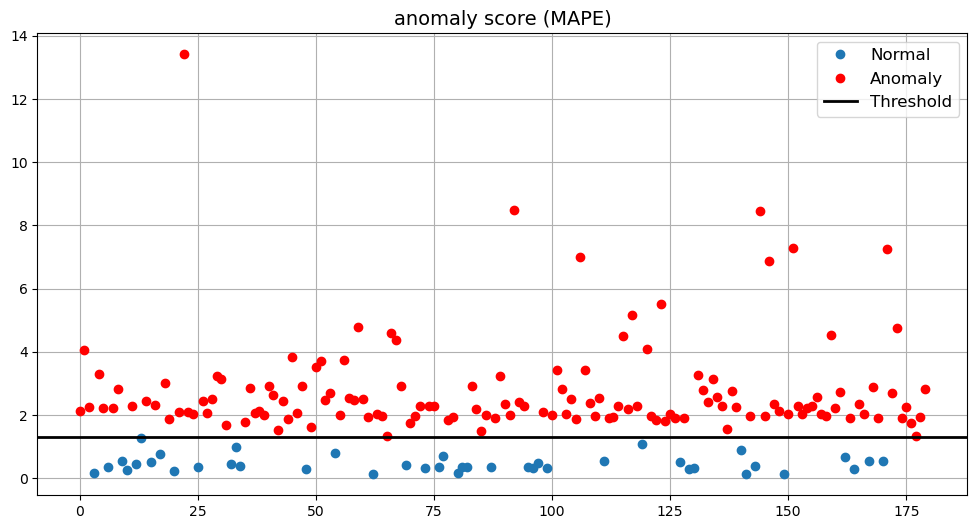

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_result[y_result.anomaly_pred==0].MAPE_mean, 'o', label='Normal')
plt.plot(y_result[y_result.anomaly_pred==1].MAPE_mean, 'ro', label='Anomaly')
plt.axhline(1.3, color='black', linewidth=2, label='Threshold')
plt.title('anomaly score (MAPE)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_FILTER = [
    'time_rms', 'time_skewness', 'time_kurtosis', 'time_crest_factor',
    'time_shape_factor', 'time_mean', 'time_std', 'time_peak',
    'time_mean_diff', 'time_std_diff', 'time_min_diff', 'time_max_diff',
    'fft_centroid', 'fft_bandwidth', 'fft_peak_freq', 'fft_over_env',
    'fft_amp_1x', 'fft_amp_2x', 'fft_amp_3x', 'fft_amp_4x', 'fft_amp_5x',
    'cD1_rms', 'cD1_kurtosis', 'cD2_rms', 'cD2_kurtosis', 
    'cD3_rms', 'cD3_kurtosis', 'cD4_rms', 'cD4_kurtosis', 
    'cD5_rms', 'cD5_kurtosis', 'cD6_rms', 'cD6_kurtosis', 
    'cD7_rms', 'cD7_kurtosis'
]
Y_FILTER = ['real_normal']

y_true = pd.read_csv('./y_true.csv')
y_pred = pd.read_csv('./y_pred.csv')

y_result = pd.DataFrame(columns=X_FILTER)
mean_list = []
for (_, elem_true), (_, elem_pred) in zip(y_true.iterrows(), y_pred.iterrows()):
    row_list = []
    for col in X_FILTER:
        up = np.abs(elem_pred[col]-elem_true[col])
        down = np.abs(elem_pred[col]+elem_true[col])/2
        if down == 0:
            row_list.append(0)
        else:
            row_list.append((up/down))
    mean_list.append(np.mean(row_list))
    y_result.loc[len(y_result)] = row_list
y_result['MAPE_mean'] = mean_list
y_result['anomaly_true'] = [1 if elem.real_normal==0 else 0 for elem in y_true.itertuples()]
y_result['anomaly_pred'] = [1 if elem.MAPE_mean>1.3 else 0 for elem in y_result.itertuples()]